In [27]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from netCDF4 import Dataset

In [14]:
pine = xr.open_dataset("pine.nc")
spruce = xr.open_dataset("spruce.nc")

In [15]:
pine_spruce_ratio = pine.volume/(pine.volume + spruce.volume)

In [30]:
pine_spruce_ratio

<xarray.DataArray 'volume' (latitude: 73, longitude: 111)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 71.5 71.25 71.0 70.75 70.5 70.25 70.0 ...
  * longitude  (longitude) float32 4.5 4.75 5.0 5.25 5.5 5.75 6.0 6.25 6.5 ...

In [16]:
ds = xr.Dataset()

In [24]:
dataset = Dataset("pine_spruce_ratio.nc", "w", format="NETCDF4_CLASSIC")
dataset.createDimension("latitude", pine.latitude.shape[0])
dataset.createDimension("longitude", pine.longitude.shape[0])
latitude = dataset.createVariable("latitude", np.float32, ("latitude",))
longitude = dataset.createVariable("longitude", np.float32, ("longitude",))
volume = dataset.createVariable("volume", np.float32, ("latitude", "longitude"))
latitude[:] = pine.latitude
longitude[:] = pine.longitude
volume[:,:] = pine_spruce_ratio
dataset.close()

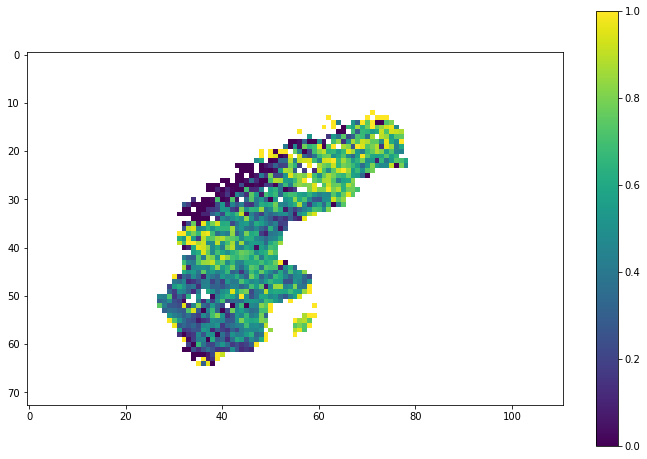

In [28]:
plt.figure(figsize=(12,8))
plt.imshow(pine_spruce_ratio)
plt.colorbar()